<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [339]:
# Read CSV
wine_csv = '../../DATA/winequality_merged.csv'

#### 1.2 Explore Data (Exploratory Data Analysis)

In [340]:
# ANSWER
df = pd.read_csv(wine_csv)
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  red_wine  
0      9.4        5         1  
1      9.8        5         1  
2      9.8        5         1  
3      9.8        6         1  
4      9.4        5         1

In [341]:
# clean column names
df.columns = df.columns.str.replace(' ', '_')

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [343]:
df.describe().T

count        mean        std      min       25%  \
fixed_acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile_acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric_acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual_sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free_sulfur_dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total_sulfur_dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   
red_wine              6497.0    0.246114   0.430779  0.00000   0.00000   

                            50%        75%        max  
fixed_acidity           7.00000    7.70000   15.90000  
volatile_acidity        0.29000    0.40000    1.58000  
citric_acid             0.31000    0.39000    1.66000  
residual_sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free_sulfur_dioxide    29.00000   41.00000  289.00000  
total_sulfur_dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000  
red_wine                0.00000    0.00000    1.00000

Documentation:
> Check '0' values for citric acid

> Check quality and red wine

In [344]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

Documentation:
> No NaN values

In [345]:
# Count 0 values for citric acid
column = df['citric_acid']
column.value_counts()[0] #select the occurrence count of zero

# Or
# column[column == 0].count()

151

In [346]:
print('Percent missing value for citric acid:', np.round((df['citric_acid'].value_counts()[0] / len(df))*100, 1),'%')

Percent missing value for citric acid: 2.3 %


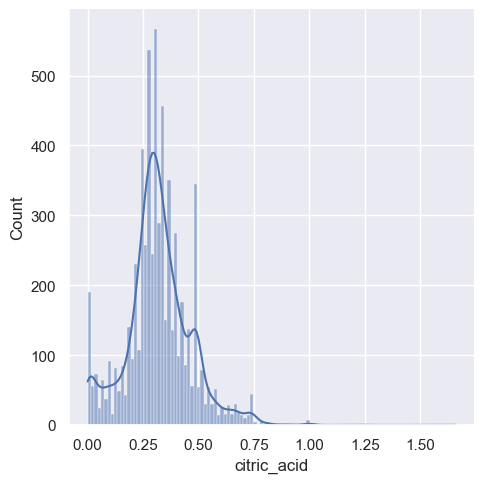

In [347]:
sns.displot(data=df, x='citric_acid', kde=True);

**Domain knowledge** from [wineserver UC Davies](https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid)

Do you need citric acid in wine?

Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor. The disadvantage of adding citric acid is its microbial instability. Since bacteria use citric acid in their metabolism, it may increase the growth of unwanted microbes. Often to increase acidity of wine, winemakers will add tartaric acid instead.

Documentation:

> Don't impute '0' values

In [348]:
# Check levels of quality
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [349]:
# Check red_wine
df.red_wine.value_counts()

0    4898
1    1599
Name: red_wine, dtype: int64

Documentation:
> 1599 red and 4898 non-red wines

In [350]:
# convert red_wine to category
df['red_wine'] = df.red_wine.astype('str')

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


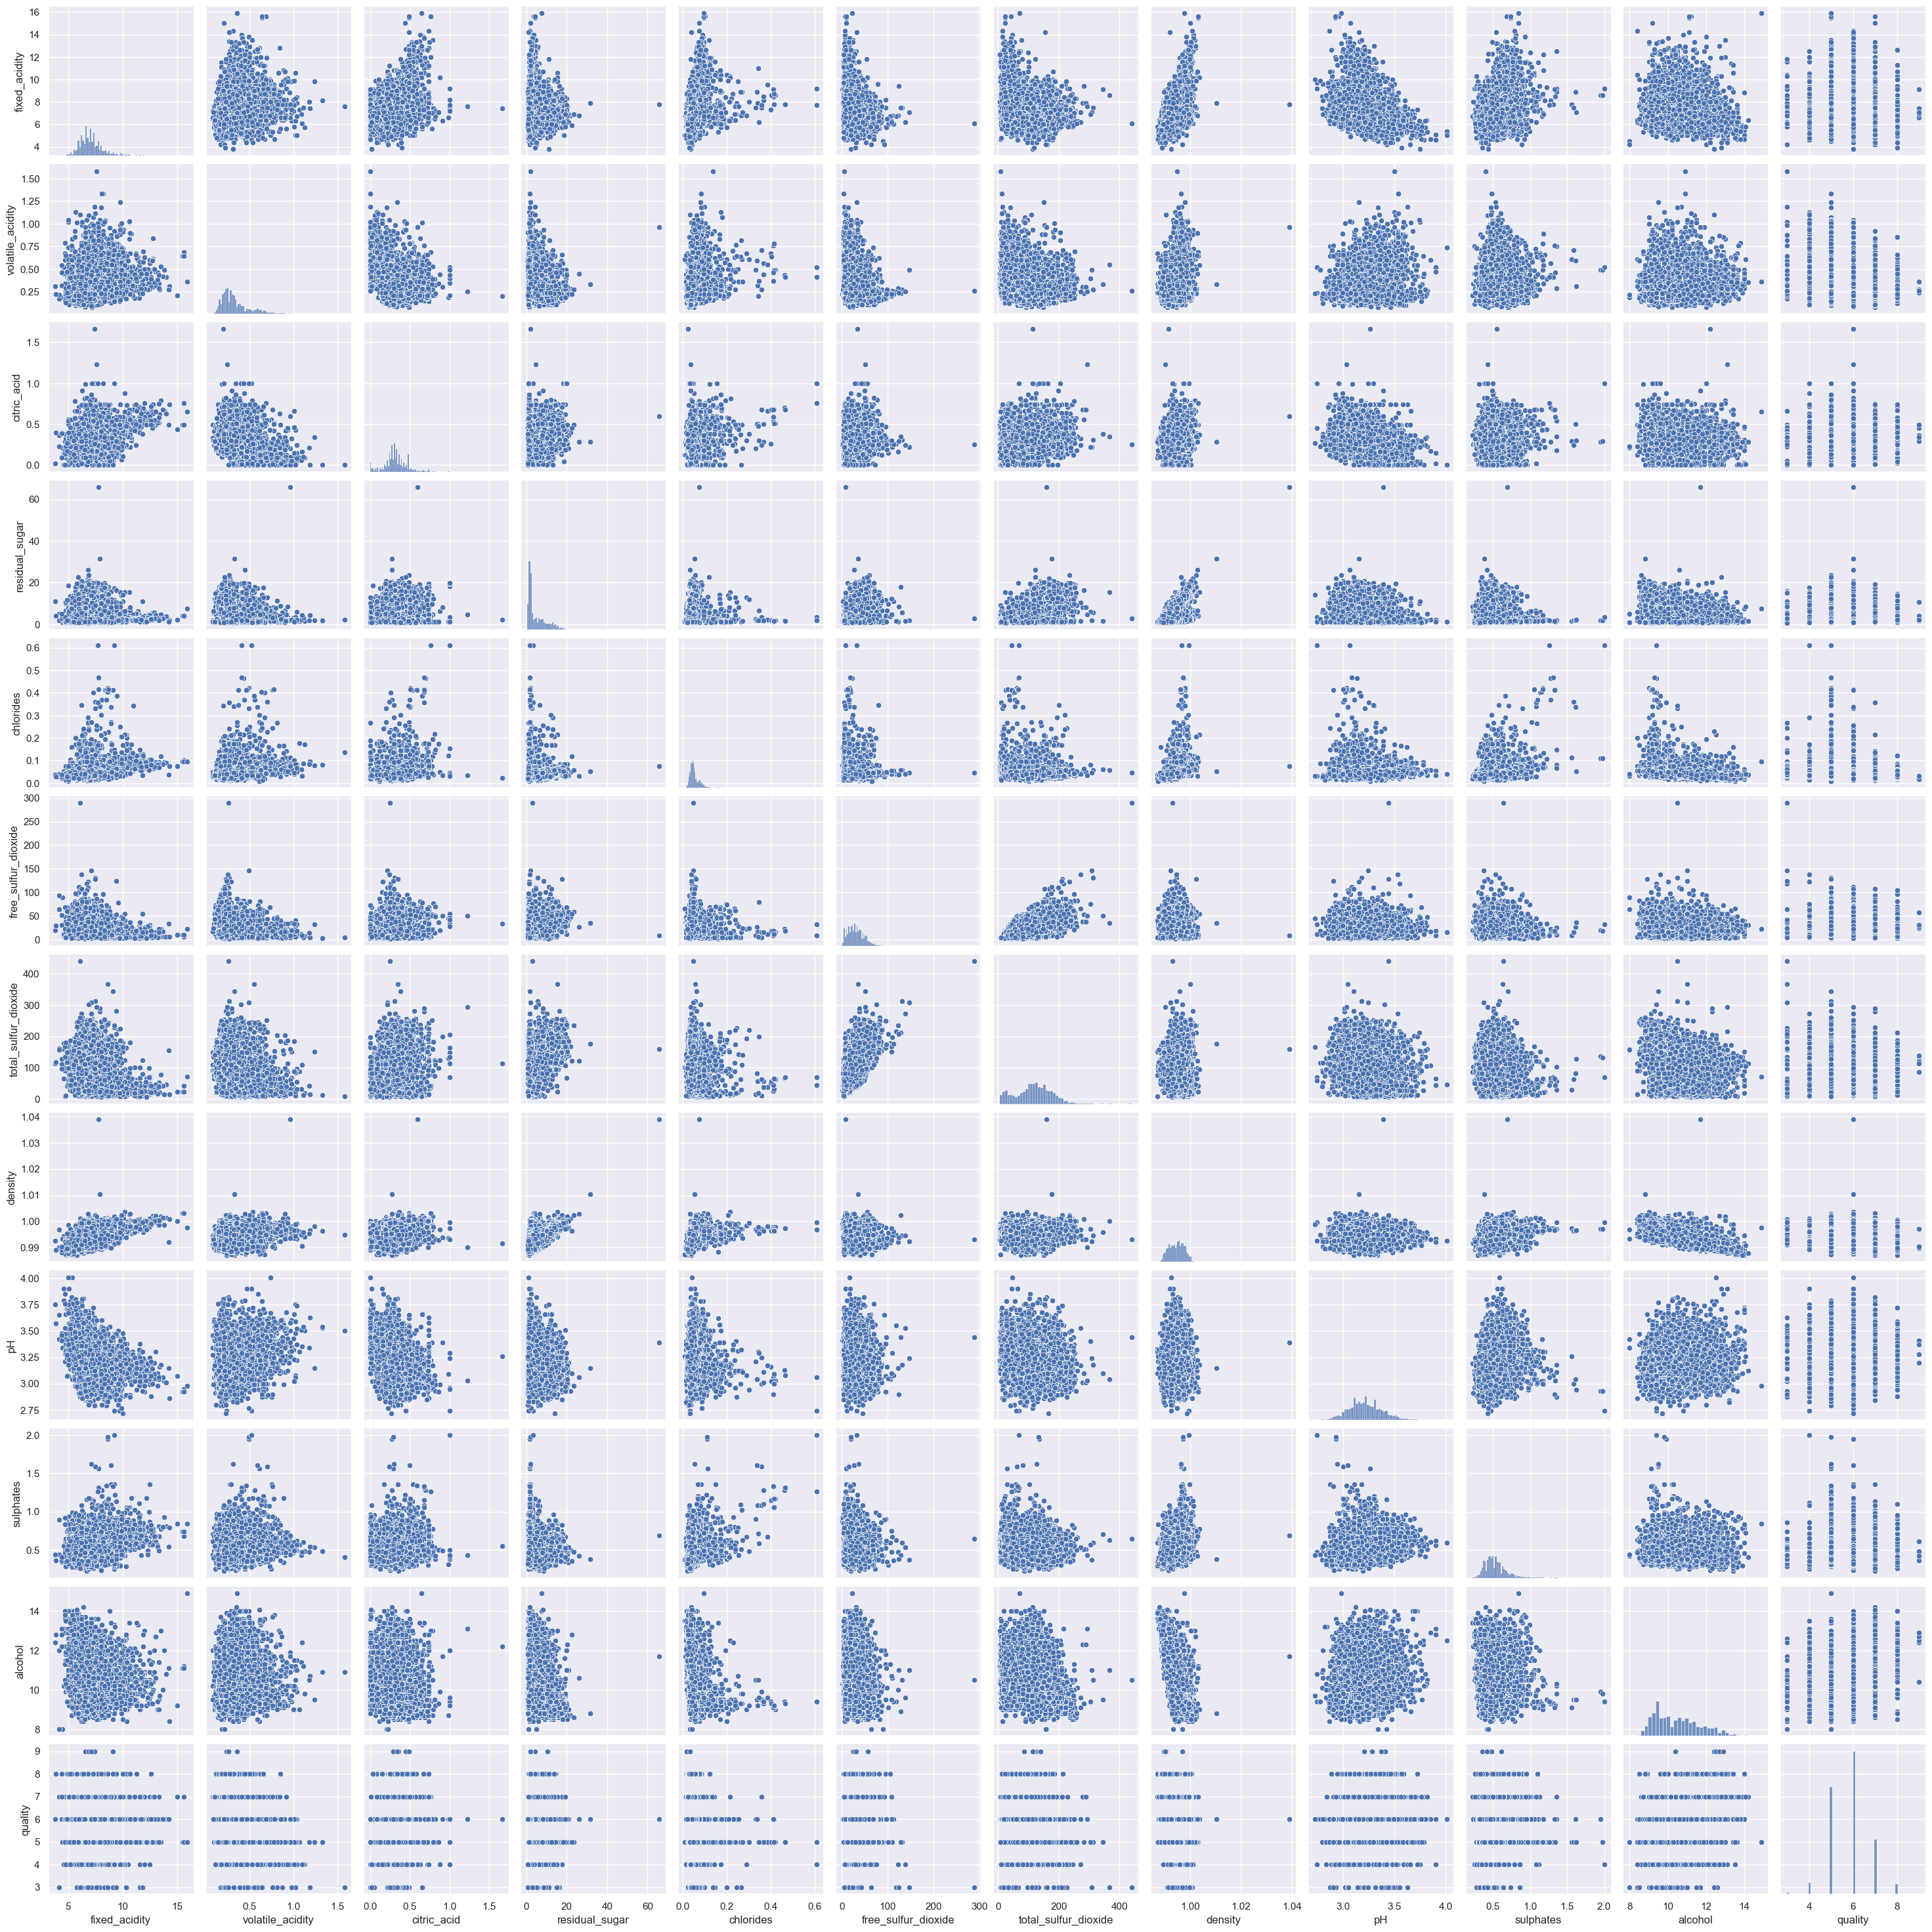

In [352]:
sns.pairplot(df);

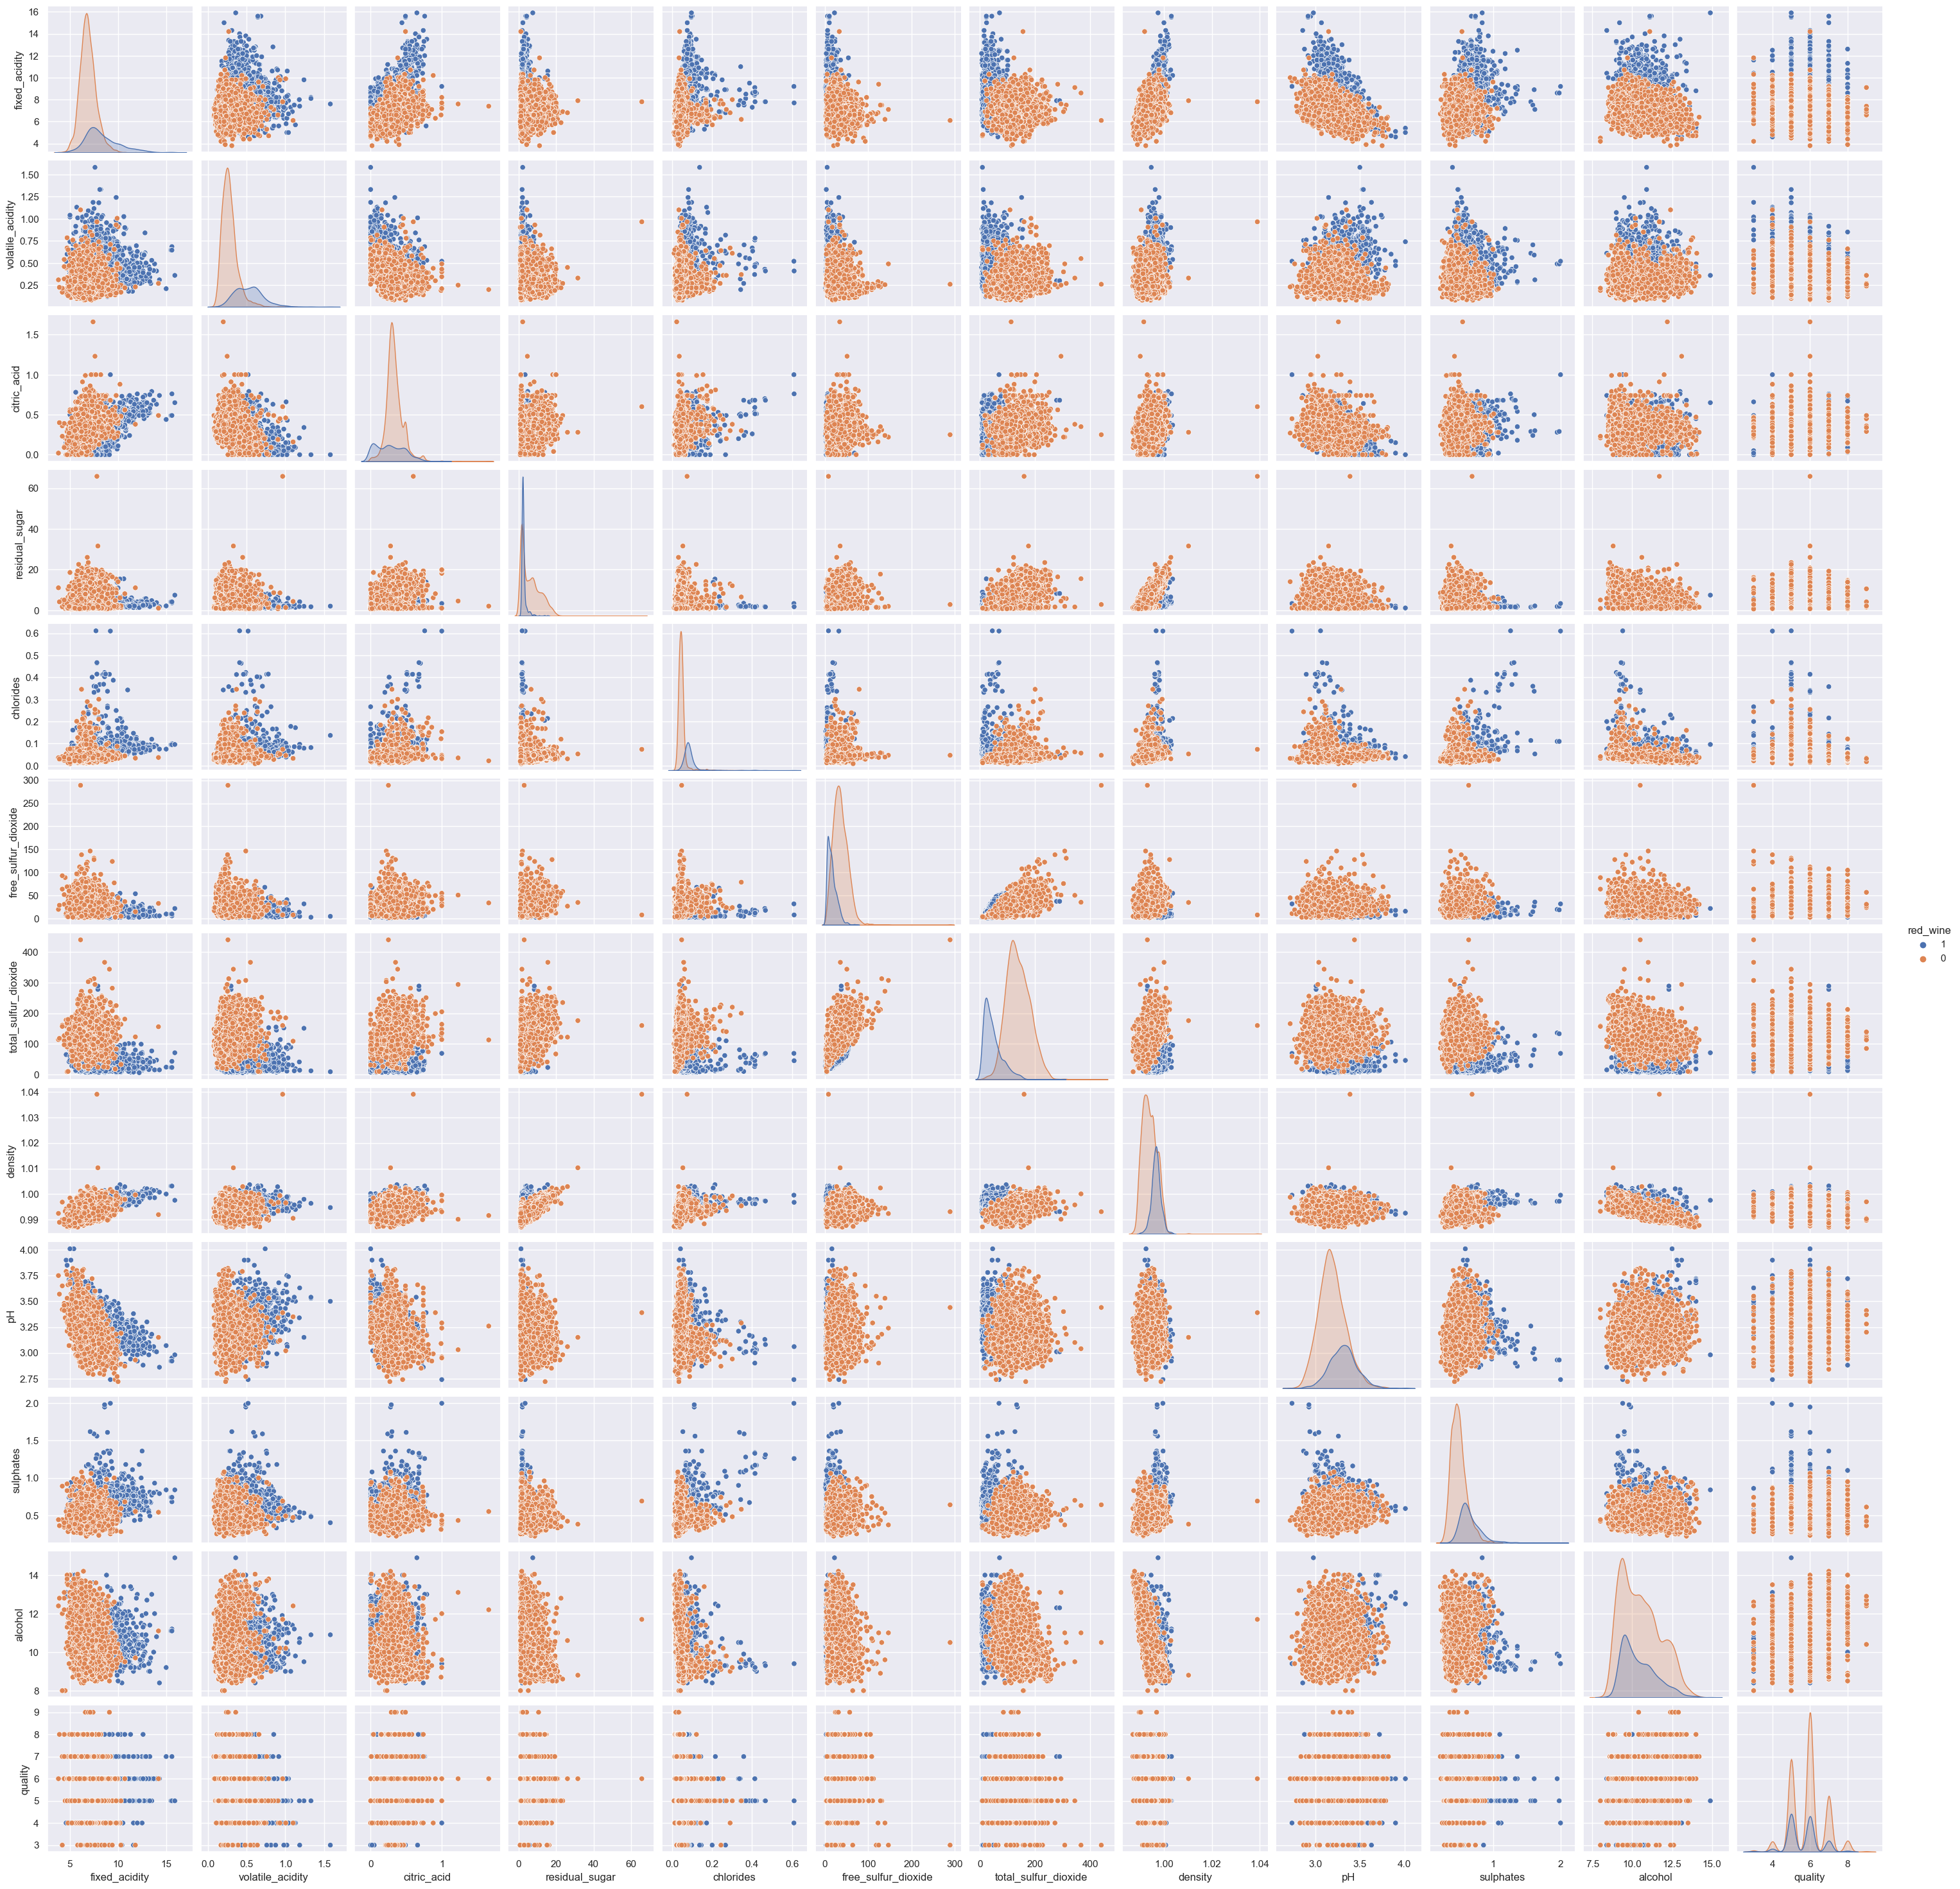

In [353]:
sns.pairplot(df, hue='red_wine');

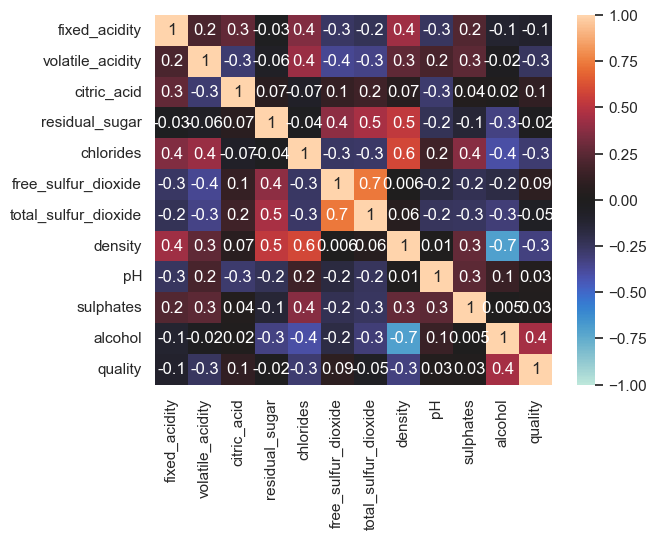

In [354]:
sns.heatmap(df.corr(method='spearman'), fmt='.1g', annot=True, vmin=-1, vmax=1, center=0);

# Note! Pearson method assumes normal data distribution. Spearman does not rely on normality (non-parametric test)

In [355]:
df_red = df[df['red_wine'] == '1']
df_red.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality red_wine  
0      9.4        5        1  
1      9.8        5        1  
2      9.8        5        1  
3      9.8        6        1  
4      9.4        5        1

In [356]:
df_white = df[df['red_wine'] == '0']
df_white.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1599            7.0              0.27         0.36            20.7      0.045   
1600            6.3              0.30         0.34             1.6      0.049   
1601            8.1              0.28         0.40             6.9      0.050   
1602            7.2              0.23         0.32             8.5      0.058   
1603            7.2              0.23         0.32             8.5      0.058   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
1599                 45.0                 170.0   1.0010  3.00       0.45   
1600                 14.0                 132.0   0.9940  3.30       0.49   
1601                 30.0                  97.0   0.9951  3.26       0.44   
1602                 47.0                 186.0   0.9956  3.19       0.40   
1603                 47.0                 186.0   0.9956  3.19       0.40   

      alcohol  quality red_wine  
1599      8.8        6        0  
1600      9.5        6        0  
1601     10.1        6        0  
1602      9.9        6        0  
1603      9.9        6        0

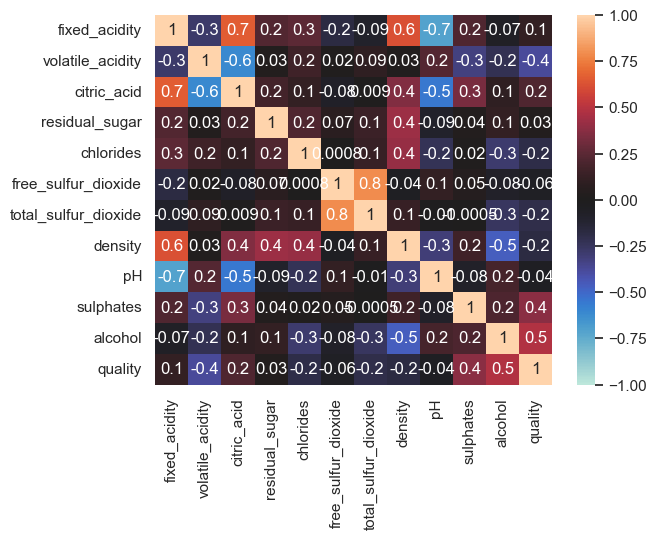

In [357]:
sns.heatmap(df_red.corr(method='spearman'), fmt='.1g', annot=True, vmin=-1, vmax=1, center=0);
# fmt: formatting string

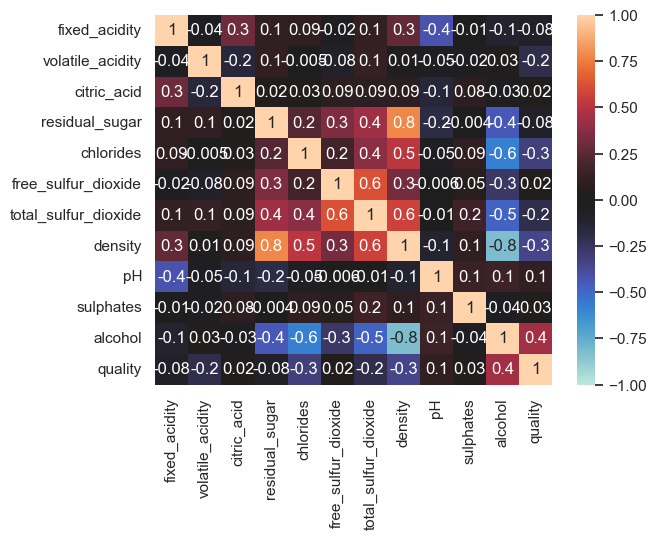

In [358]:
sns.heatmap(df_white.corr(method='spearman'), fmt='.1g', annot=True, vmin=-1, vmax=1, center=0);

Documentation:
> No obvious strong correlation between wine quality and other features

In [359]:
df_corr = df.corr()
df_corr

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity              -0.111981   0.298195            -0.282735   
volatile_acidity           -0.196011   0.377124            -0.352557   
citric_acid                 0.142451   0.038998             0.133126   
residual_sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free_sulfur_dioxide         0.402871  -0.195045             1.000000   
total_sulfur_dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile_acidity                 -0.414476  0.271296  0.261454   0.225984   
citric_acid                       0.195242  0.096154 -0.329808   0.056197   
residual_sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free_sulfur_dioxide               0.720934  0.025717 -0.145854  -0.188457   
total_sulfur_dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   

                       alcohol   quality  
fixed_acidity        -0.095452 -0.076743  
volatile_acidity     -0.037640 -0.265699  
citric_acid          -0.010493  0.085532  
residual_sugar       -0.359415 -0.036980  
chlorides            -0.256916 -0.200666  
free_sulfur_dioxide  -0.179838  0.055463  
total_sulfur_dioxide -0.265740 -0.041385  
density              -0.686745 -0.305858  
pH                    0.121248  0.019506  
sulphates            -0.003029  0.038485  
alcohol               1.000000  0.444319  
quality               0.444319  1.000000

In [360]:
# Return an array of zeros of same shape and type as given array, i.e. generate mask of "0's"
mask = np.zeros_like(df_corr, dtype=bool)
mask

array([[False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False

In [361]:
print(np.size(mask), mask.shape, mask.ndim)

144 (12, 12) 2


In [362]:
# Return indices for upper triangle of array
ind_upper = np.triu_indices_from(mask)
ind_upper

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,
         5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
         8,  8,  8,  8,  9,  9,  9, 10, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  1,  2,  3,  4,  5,
         6,  7,  8,  9, 10, 11,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  3,
         4,  5,  6,  7,  8,  9, 10, 11,  4,  5,  6,  7,  8,  9, 10, 11,  5,
         6,  7,  8,  9, 10, 11,  6,  7,  8,  9, 10, 11,  7,  8,  9, 10, 11,
         8,  9, 10, 11,  9, 10, 11, 10, 11, 11]))

In [363]:
print(np.size(ind_upper), np.ndim(ind_upper))

156 2


In [364]:
# Return indices for lower triangle of array
np.tril_indices_from(mask)

(array([ 0,  1,  1,  2,  2,  2,  3,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,
         5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,
         7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11]),
 array([ 0,  0,  1,  0,  1,  2,  0,  1,  2,  3,  0,  1,  2,  3,  4,  0,  1,
         2,  3,  4,  5,  0,  1,  2,  3,  4,  5,  6,  0,  1,  2,  3,  4,  5,
         6,  7,  0,  1,  2,  3,  4,  5,  6,  7,  8,  0,  1,  2,  3,  4,  5,
         6,  7,  8,  9,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,
         2,  3,  4,  5,  6,  7,  8,  9, 10, 11]))

In [365]:
mask[np.triu_indices_from(mask)] = True #return upper triangle

upper = mask[np.triu_indices_from(mask)]
upper

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [366]:
print(np.size(upper), np.ndim(upper))

78 1


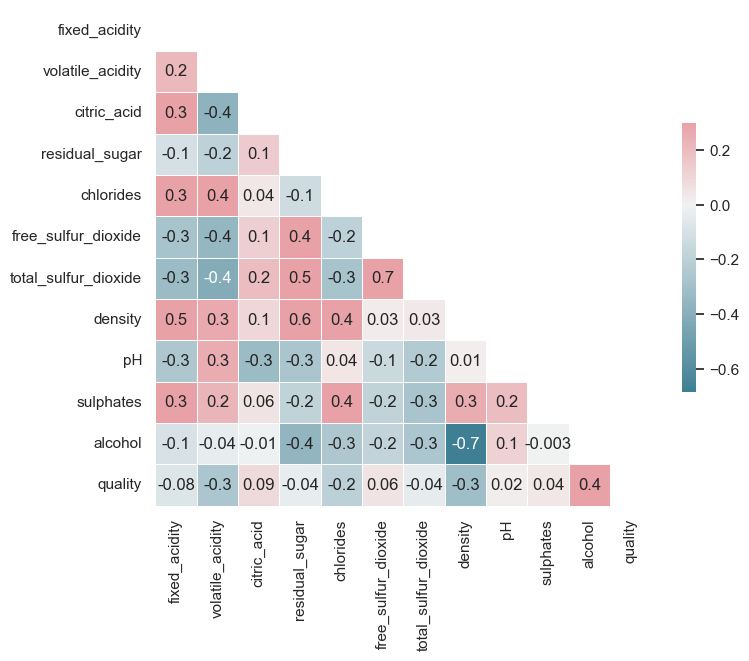

In [367]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df_corr, dtype=bool) #generate mask of "0's"
mask[np.triu_indices_from(mask)] = True #return upper triangle

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0, fmt='.1g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

In [368]:
# Prepare data for boxplot plotting
boxplot_columns = df.iloc[:, 0:11]
boxplot_columns.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [369]:
for i, col in enumerate(boxplot_columns.columns):
    print(i, col)

0 fixed_acidity
1 volatile_acidity
2 citric_acid
3 residual_sugar
4 chlorides
5 free_sulfur_dioxide
6 total_sulfur_dioxide
7 density
8 pH
9 sulphates
10 alcohol


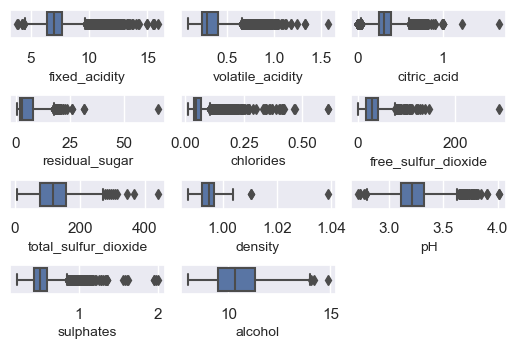

In [370]:
# Plot boxplot for each feature w/ separate y-axis to visualize outliers

for i, col in enumerate(boxplot_columns.columns):
    sns.set()
    plt.subplot(5, 3, i+1) # nrows, ncols, index
    sns.boxplot(x=col, data=df)
    plt.xlabel(f'{col}', fontsize=10)
    plt.subplots_adjust(hspace=2, wspace=0.1)

Documentation:
> Apart from alcohol and density, all other features show plenty of outliers

### 2. Set Target Variable

Create a target variable for wine quality.

In [371]:
# Target Variable
y = df['quality']

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

In [372]:
abs(df.corr()['quality']).sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile_acidity        0.265699
chlorides               0.200666
citric_acid             0.085532
fixed_acidity           0.076743
free_sulfur_dioxide     0.055463
total_sulfur_dioxide    0.041385
sulphates               0.038485
residual_sugar          0.036980
pH                      0.019506
Name: quality, dtype: float64

In [373]:
# ANSWER

# Select features showing highest correlation
X = df[['density', 'volatile_acidity', 'alcohol', 'chlorides']]

### 4. Using Linear Regression Create a Model and Test Score

In [374]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [375]:
# Obviously, data should be scaled, but ignore this step for now
# scale = StandardScaler() #or minmax = MinMaxScaler()
# scale.fit_transform(X)

In [376]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [377]:
# Create a model for Linear Regression
linreg = LinearRegression()

# Fit the model with the Training data
linreg.fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
print('R^2 train:', linreg.score(X_train, y_train))

# Calculate the score (R^2 for Regression) for Testing Data
print('R^2 test:',linreg.score(X_test, y_test))

R^2 train: 0.2707886547599643
R^2 test: 0.2521354751304964


In [378]:
X.columns

Index(['density', 'volatile_acidity', 'alcohol', 'chlorides'], dtype='object')

In [379]:
linreg.coef_ #attribute

array([40.83297487, -1.51250401,  0.39187742, -0.08243747])

In [380]:
linreg_coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': linreg.coef_}).set_index('feature').T
linreg_coef_df

feature        density  volatile_acidity   alcohol  chlorides
coefficient  40.832975         -1.512504  0.391877  -0.082437

### BONUS: Cross validation

In [381]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [382]:
k_fold = KFold(5) # Provides train/test indices to split data in train/test sets
k_fold

KFold(n_splits=5, random_state=None, shuffle=False)

In [383]:
list(k_fold.split(X))

[(array([1300, 1301, 1302, ..., 6494, 6495, 6496]),
  array([   0,    1,    2, ..., 1297, 1298, 1299])),
 (array([   0,    1,    2, ..., 6494, 6495, 6496]),
  array([1300, 1301, 1302, ..., 2597, 2598, 2599])),
 (array([   0,    1,    2, ..., 6494, 6495, 6496]),
  array([2600, 2601, 2602, ..., 3896, 3897, 3898])),
 (array([   0,    1,    2, ..., 6494, 6495, 6496]),
  array([3899, 3900, 3901, ..., 5195, 5196, 5197])),
 (array([   0,    1,    2, ..., 5195, 5196, 5197]),
  array([5198, 5199, 5200, ..., 6494, 6495, 6496]))]

In [384]:
len(list(k_fold.split(X)))

5

In [385]:
k_fold = KFold(5)
for k, (train, test) in enumerate(k_fold.split(X)):
    print(k, train, test)

0 [1300 1301 1302 ... 6494 6495 6496] [   0    1    2 ... 1297 1298 1299]
1 [   0    1    2 ... 6494 6495 6496] [1300 1301 1302 ... 2597 2598 2599]
2 [   0    1    2 ... 6494 6495 6496] [2600 2601 2602 ... 3896 3897 3898]
3 [   0    1    2 ... 6494 6495 6496] [3899 3900 3901 ... 5195 5196 5197]
4 [   0    1    2 ... 5195 5196 5197] [5198 5199 5200 ... 6494 6495 6496]


In [386]:
X.iloc[train, ].head()

density  volatile_acidity  alcohol  chlorides
0   0.9978              0.70      9.4      0.076
1   0.9968              0.88      9.8      0.098
2   0.9970              0.76      9.8      0.092
3   0.9980              0.28      9.8      0.075
4   0.9978              0.70      9.4      0.076

In [387]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True, random_state = 42)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
    # Fit model with training set
    linreg.fit(X_train, y_train)
    
    # Make predictions with training and test set
    train_preds = linreg.predict(X_train)
    test_preds = linreg.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(linreg.score(X_train, y_train))
    test_scores.append(linreg.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False)) 
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))

#squared=False: returns RMSE
#squared=True: returns MSE

In [388]:
train_scores

[0.2707886547599643,
 0.2665878954703603,
 0.26504396919298223,
 0.26922450314296775,
 0.2656774209647075]

In [389]:
zipped = list(zip(train_scores, train_rmse, test_scores, test_rmse))
zipped

[(0.2707886547599643,
  0.7485315732041768,
  0.2521354751304964,
  0.7431910326179539),
 (0.2665878954703603,
  0.7477815394148011,
  0.2699656944808979,
  0.7459892542266741),
 (0.26504396919298223,
  0.7476460763133204,
  0.27547314421893354,
  0.7465613054391859),
 (0.26922450314296775,
  0.7441577456229715,
  0.2596456592486085,
  0.7603986655765489),
 (0.2656774209647075,
  0.7485541078728234,
  0.2730320470137477,
  0.7431884148056724)]

In [390]:
# Create a metrics_df dataframe to display r2 and rmse scores

zipped = list(zip(train_scores, train_rmse, test_scores, test_rmse))
metrics_df = pd.DataFrame(zipped, columns=['train_scores', 'train_rmse', 'test_scores', 'test_rmse'])
metrics_df.index += 1 #or use list comprehension pd.DataFrame() as below
metrics_df

train_scores  train_rmse  test_scores  test_rmse
1      0.270789    0.748532     0.252135   0.743191
2      0.266588    0.747782     0.269966   0.745989
3      0.265044    0.747646     0.275473   0.746561
4      0.269225    0.744158     0.259646   0.760399
5      0.265677    0.748554     0.273032   0.743188

In [391]:
# Alternatively,

metrics_df = pd.DataFrame({'Training_R2': train_scores, 
                           'Test_R2': test_scores, 
                           'Training_RMSE': train_rmse, 
                           'Test_RMSE': test_rmse},
                          index=[i+1 for i in range(5)]) # list comprehension
metrics_df

Training_R2   Test_R2  Training_RMSE  Test_RMSE
1     0.270789  0.252135       0.748532   0.743191
2     0.266588  0.269966       0.747782   0.745989
3     0.265044  0.275473       0.747646   0.746561
4     0.269225  0.259646       0.744158   0.760399
5     0.265677  0.273032       0.748554   0.743188

In [392]:
metrics_df['Test_RMSE'].mean()

0.747865734533207

MSE, RMSE: model is off on quality by ~0.75 

In [393]:
# Describe the metrics
metrics_df.describe().T

count      mean       std       min       25%       50%  \
Training_R2      5.0  0.267464  0.002448  0.265044  0.265677  0.266588   
Test_R2          5.0  0.266050  0.009843  0.252135  0.259646  0.269966   
Training_RMSE    5.0  0.747334  0.001824  0.744158  0.747646  0.747782   
Test_RMSE        5.0  0.747866  0.007177  0.743188  0.743191  0.745989   

                    75%       max  
Training_R2    0.269225  0.270789  
Test_R2        0.273032  0.275473  
Training_RMSE  0.748532  0.748554  
Test_RMSE      0.746561  0.760399

In [394]:
metrics_df['Test_R2'].mean()

0.26605040401853686

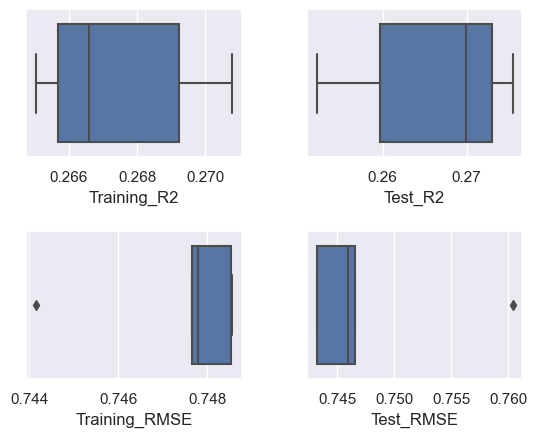

In [395]:
for i, col in enumerate(metrics_df.columns):
    sns.set()
    plt.subplot(2, 2, i+1) # nrows, ncols, index
    sns.boxplot(x=col, data=metrics_df)
    plt.xlabel(f'{col}', fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? **Mean R^2 for test data is 0.27**

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



